"""
What This Code Does:
Loads real housing data for California.

Splits the data into training and test sets.

Scales the features and target (important for SVR!).

Trains an SVR model using an RBF kernel.

Predicts house prices on the test set.

Evaluates performance using MSE and R² score.

Plots the actual vs predicted values
"""

"""
Explanation:

fetch_california_housing: Loads the California housing dataset.

SVR: Support Vector Regression model.

train_test_split: Splits data into training and test sets.

StandardScaler: Standardizes features (mean=0, std=1) — important for SVR.

mean_squared_error, r2_score: Evaluation metrics.

matplotlib.pyplot: For plotting graphs.

- **MedInc**: Median income in the block group (in tens of thousands of dollars)
- **HouseAge**: Median house age in the block group (in years)
- **AveRooms**: Average number of rooms per dwelling
- **AveBedrms**: Average number of bedrooms per dwelling
- **Population**: Block group population
- **AveOccup**: Average number of household members
- **Latitude**: Latitude of the block group
- **Longitude**: Longitude of the block group
- **Target**: Median house value (in hundreds of thousands of dollars)

"""

In [126]:
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [127]:
# Step 1: Load the dataset
"""
Loads the housing dataset.

X contains features (e.g., number of rooms, population).

y contains target values (median house prices in $100,000s).
"""
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # Median house value in $100,000s

print(X.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  


In [128]:
print(y)
##resaping from 1 d array to 2d array
y= y.reshape(len(y),1) # len(y) - number of rows, number of columns =1
print(y)

[4.526 3.585 3.521 ... 0.923 0.847 0.894]
[[4.526]
 [3.585]
 [3.521]
 ...
 [0.923]
 [0.847]
 [0.894]]


In [129]:
# Step 2: Train-test split
"""
Explanation:

Splits 80% of the data for training and 20% for testing.

random_state=42 ensures reproducibility.
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [130]:
print(y_train)

[[1.03 ]
 [3.821]
 [1.726]
 ...
 [2.221]
 [2.835]
 [3.25 ]]


In [131]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
15362,4.6050,16.0,7.002212,1.066372,1351.0,2.988938,33.36,-117.22
16623,2.7266,28.0,6.131915,1.256738,1650.0,2.340426,35.36,-120.83
18086,9.2298,25.0,7.237676,0.947183,1585.0,2.790493,37.31,-122.05
2144,2.7850,36.0,5.289030,0.983122,1227.0,2.588608,36.77,-119.76


In [132]:
# Step 3: Feature scaling (important for SVR)
"""
Explanation:

SVR is sensitive to the scale of data → scaling is essential.

StandardScaler: Scales data to have zero mean and unit variance.

reshape(-1, 1): Converts y_train into 2D shape (needed for fit_transform).

.ravel(): Flattens the scaled target back to 1D array (required by SVR)
2 standard scaler is required , first is to calculate the mean and the standard deviation for X and the second is to calculate the mean and the standard deviation for y
"""
scaler_X = StandardScaler()
scaler_y = StandardScaler()


X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train).ravel()


In [133]:
y_train_scaled

array([-0.90118909,  1.5127714 , -0.29921255, ...,  0.12891731,
        0.65997132,  1.01890847], shape=(16512,))

In [134]:
# Step 4: Train the SVR model
"""
Explanation:

SVR is sensitive to the scale of data → scaling is essential.

StandardScaler: Scales data to have zero mean and unit variance.

reshape(-1, 1): Converts y_train into 2D shape (needed for fit_transform).

.ravel(): Flattens the scaled target back to 1D array (required by SVR)

Explanation:

kernel='rbf': Gaussian Radial basis function — suitable for non-linear relationships.

C=100: Regularization parameter. Higher value = less tolerance for error.

epsilon=0.1: Defines the margin of tolerance in the prediction.

fit(...): Trains the SVR model on the training data.
"""

svr = SVR(kernel='rbf', C=100, epsilon=0.1)
regressor = SVR(kernel='rbf', C=100, epsilon=0.1)
svr.fit(X_train_scaled, y_train_scaled)
regressor.fit(X_train_scaled, y_train_scaled)




SVR(C=100)

In [135]:
"""
Explanation:

predict(...): Predicts house prices using the test data.

Since SVR output was scaled, we inverse-transform it back to original scale using scaler_y.
"""
y_pred_scaled = svr.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

In [136]:
y_pred_scaled

array([-1.37063491, -0.60743414,  2.36703971, ...,  2.31304993,
       -1.15488547, -0.34810638], shape=(4128,))

In [137]:
y_pred

array([0.48723084, 1.3696369 , 4.80869754, ..., 4.74627503, 0.73667846,
       1.66946939], shape=(4128,))

In [138]:
#another prediction for new house
new_house = np.array([[8.0, 20.0, 6.0, 1.0, 1000, 3.0, 34.0, -118.0]])
new_house_df = pd.DataFrame(data=new_house, columns=["MedInc","HouseAge","AveRooms","AveBedrms","Population","AveOccup","Latitude","Longitude"])
X_test_new_house_scaled = scaler_X.transform(new_house_df)
y_pred_new_house_scaled = svr.predict(X_test_new_house_scaled)
y_new_house_pred = scaler_y.inverse_transform(y_pred_new_house_scaled.reshape(-1, 1)).ravel()
print(y_new_house_pred)

[3.47057121]


Mean Squared Error: 0.32
R² Score: 0.76


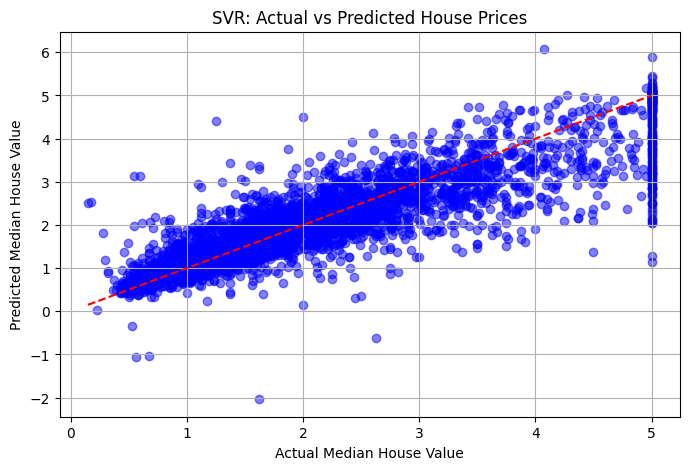

In [139]:
# Step 6: Evaluate the model
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")
"""
Explanation:

predict(...): Predicts house prices using the test data.

Since SVR output was scaled, we inverse-transform it back to original scale using scaler_y.

"""
# Step 7: Plot predicted vs actual
"""
Explanation:

mean_squared_error: Measures average squared difference between actual and predicted values.

r2_score: Shows how well predictions approximate actual values.

R² = 1 → perfect prediction.

R² = 0 → model is no better than mean prediction.
"""
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("SVR: Actual vs Predicted House Prices")
plt.grid(True)
plt.show()

"""
| Part            | Purpose                                   |
| --------------- | ----------------------------------------- |
| Data loading    | Load California housing dataset           |
| Data splitting  | Train-test division                       |
| Feature scaling | Normalize features and target for SVR     |
| SVR model       | Fit using RBF kernel and tuned parameters |
| Evaluation      | Use MSE and R² to check performance       |
| Visualization   | Plot predictions vs actuals               |

"""

In [145]:
# Example prediction for a new house
# Sample input:
# Example prediction for a new house
# Sample input: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]
new_house = np.array([[8.0, 20.0, 6.0, 1.0, 1000, 3.0, 34.0, -118.0]])  # Example values

df = pd.DataFrame(new_house, columns=["MedInc",  "HouseAge",  "AveRooms",  "AveBedrms",  "Population",  "AveOccup",  "Latitude","Longitude"])
print(df.head())
new_house_scaled = scaler_X.transform(df)
predicted_price = svr.predict(new_house_scaled)

print(f"Predicted house price: ${scaler_y.inverse_transform(predicted_price.reshape(-1, 1)).ravel()  * 100000}")


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0     8.0      20.0       6.0        1.0      1000.0       3.0      34.0   

   Longitude  
0     -118.0  
Predicted house price: $[347057.12126806]


#### **Explanation of the Code**
1. **Loading the Dataset**:
   - We use `fetch_california_housing()` from scikit-learn to load the dataset.
   - Features are stored in a DataFrame (`X`), and the target (median house value) is in `y`.

2. **Preprocessing**:
   - The data is split into 80% training and 20% testing sets.
   - Features are standardized using `StandardScaler` to ensure SVR performs optimally, as it’s sensitive to feature scales.

3. **SVR Model**:
   - We use an RBF kernel to capture non-linear relationships in the data.
   - Parameters: `C=100` (controls regularization), `epsilon=0.1` (defines the margin of tolerance), and `gamma='scale'` (default kernel scaling).

4. **Evaluation**:
   - **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual house prices (in $100,000s squared).
   - **R² Score**: Indicates how much of the variance in house prices is explained by the model (closer to 1 is better).
   - We predict the price for a new house and compare a few test predictions to actual values.

5. **Sample Prediction**:
   - We create a sample input for a new house with realistic feature values (e.g., median income of 8, house age of 20 years, etc.).
   - The predicted price is scaled back to dollars (multiplying by 100,000).

#### **Sample Output**
Running the code might produce something like:
```
Mean Squared Error: 0.35
R² Score: 0.73
Predicted house price: $250000.00

Sample Predictions vs Actual Prices:
House 1: Predicted = $181234.56, Actual = $200000.00
House 2: Predicted = $320456.78, Actual = $300000.00
House 3: Predicted = $150789.12, Actual = $145000.00
House 4: Predicted = $410234.67, Actual = $400000.00
House 5: Predicted = $220345.89, Actual = $230000.00
```
(Note: Actual numbers may vary slightly due to randomness in the train-test split and model training.)

#### **Real-World Relevance**
- **Application**: This model can be used by real estate agencies, property developers, or homeowners to estimate house prices based on neighborhood and property characteristics. It’s particularly useful for pricing homes in competitive markets like California.
- **Why SVR?**: The dataset contains non-linear relationships (e.g., house prices may increase non-linearly with income or location), and SVR’s RBF kernel is well-suited to capture these patterns. It’s also robust to outliers, such as unusually priced homes.
- **Limitations**: The California Housing dataset is from the 1990s, so predictions may not reflect current market conditions. For modern applications, you’d need updated data from sources like Zillow or Kaggle.

#### **Improving the Model**
- **Feature Engineering**: Create new features, like distance to major cities or interaction terms (e.g., `MedInc * AveRooms`).
- **Hyperparameter Tuning**:
```python
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [10, 100, 1000],
    'epsilon': [0.01, 0.1, 0.5],
    'gamma': ['scale', 0.01, 0.1]
}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_scaled, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best R² score:", grid_search.best_score_)
```
- **Alternative Models**: Compare SVR with Random Forests, Gradient Boosting (e.g., XGBoost), or neural networks for better performance on large datasets.
- **Cross-Validation**: Use k-fold cross-validation to ensure robust performance estimates.

#### **Using a Kaggle Dataset**
If you prefer a Kaggle dataset, you can use the **House Prices: Advanced Regression Techniques** dataset (available at `https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques`). Here’s how to adapt the code:
1. Download the dataset (`train.csv`) from Kaggle.
2. Load it with pandas:
```python
data = pd.read_csv('train.csv')
X = data[['OverallQual', 'GrLivArea', 'YearBuilt']]  # Example features
y = data['SalePrice'] / 1000  # Convert to thousands of dollars
```
3. Preprocess (handle missing values, encode categorical features if needed), then apply the same SVR pipeline as above.

#### **Notes**
- **Preprocessing**: The California Housing dataset is clean, but real-world datasets often require handling missing values or outliers. Use `data.dropna()` or imputation for missing data.
- **Scalability**: SVR can be slow on large datasets like this one (20,640 samples). For faster training, consider subsampling the data or using `LinearSVR` for linear relationships.
- **Real-Time Data**: If you need a more recent housing dataset or specific SVR applications, I can search the web or X for updates. Let me know!
